In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os

# Set your target directory
target_dir = "data/"

# Create directory if it doesn't exist
os.makedirs(target_dir, exist_ok=True)

# Download TN1 to TN8 into the target directory
for i in range(1, 2):
    filename = f"TN{i}.tar.gz"
    url = f"https://zenodo.org/records/7225578/files/{filename}?download=1"
    output_path = os.path.join(target_dir, filename)
    print(f"Downloading {filename} to {output_path}...")
    !curl -L -o "{output_path}" "{url}"

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 63.1M  100 63.1M    0     0  19.2M      0  0:00:03  0:00:03 --:--:-- 19.2M


In [ ]:
import glob
import os

data_dir = "data/"

for tar_path in glob.glob(os.path.join(data_dir, "*.tar.gz")):
    print(f"Extracting {tar_path}...")
    !tar -xvf "{tar_path}" -C "{data_dir}"

Extracting data/TN1.tar.gz...
TN1/
TN1/cellclust_gt.csv
TN1/reads_per_bin.csv
TN1/dataframe.tsv
TN1/binned_read_count_embedding.csv
TN1/mut_map.csv
TN1/cell_map.csv


In [ ]:
ROOT_DIR = "data/TN1"

In [ ]:
import pandas as pd

In [ ]:
df_read_cnt_emb = pd.read_csv(os.path.join(ROOT_DIR, "binned_read_count_embedding.csv"))
df_read_cnt_emb

,cell,V1,V2
0,214,-11.151801,-0.602808
1,854,-11.073360,-0.689431
2,21,-11.064445,-0.700593
3,263,-11.092979,-0.699121
4,651,-11.251510,-0.512353
...,...,...,...
1095,493,-2.946126,-3.048497
1096,449,-2.912511,-3.101893
1097,286,-2.891105,-3.152516
1098,896,-2.918452,-3.103966


In [ ]:
df_cell_map = pd.read_csv(os.path.join(ROOT_DIR, "cell_map.csv"))
df_cell_map

,cell_id,cell
0,0,GTTGTGGGCATACAT
1,1,TATTCACTAATGGCC
2,2,AGTCTACCAGGTACG
3,3,CGGGCTAAATTCCGA
4,4,TATCTATTTGCGATC
...,...,...
1095,1095,TAGGATGCACTAGGG
1096,1096,TTGCGCAGAAAGTTC
1097,1097,CGTGCGAGGGGATCC
1098,1098,ATTGTGGCTGGCGGC


In [ ]:
df_cellclust = pd.read_csv(os.path.join(ROOT_DIR, "cellclust_gt.csv"))
df_cellclust

,cell,cluster
0,214,1
1,854,1
2,21,1
3,263,1
4,651,1
...,...,...
1095,493,9
1096,449,9
1097,286,9
1098,896,9


In [ ]:
df_plot = pd.merge(df_read_cnt_emb, df_cellclust, left_on='cell', right_on='cell', how='left')
df_plot

,cell,V1,V2,cluster
0,214,-11.151801,-0.602808,1
1,854,-11.073360,-0.689431,1
2,21,-11.064445,-0.700593,1
3,263,-11.092979,-0.699121,1
4,651,-11.251510,-0.512353,1
...,...,...,...,...
1095,493,-2.946126,-3.048497,9
1096,449,-2.912511,-3.101893,9
1097,286,-2.891105,-3.152516,9
1098,896,-2.918452,-3.103966,9


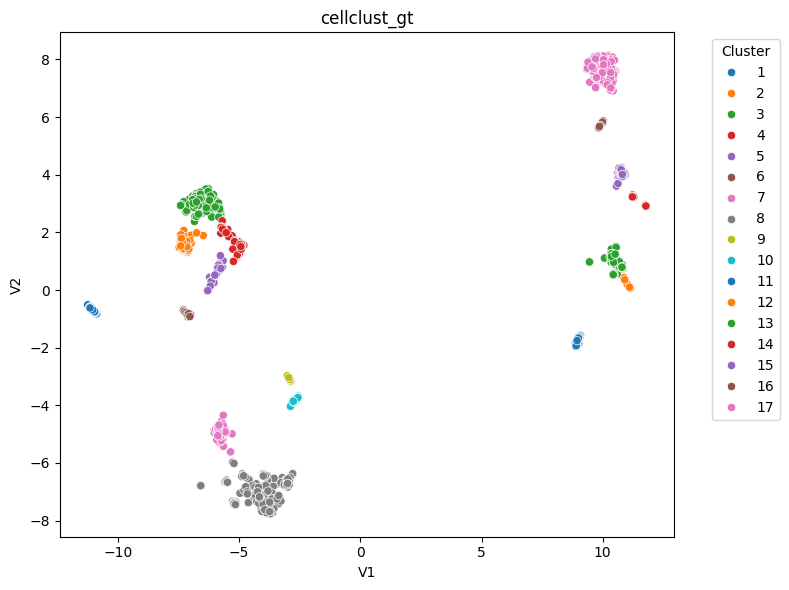

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_plot, x='V1', y='V2', hue='cluster', palette='tab10')
plt.title("cellclust_gt")
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [ ]:
dataframe = pd.read_csv(os.path.join(ROOT_DIR, "dataframe.tsv"), header=None, names=['chrom', 'snv_pos', 'cell_id', 'alt_base', 'alt', 'total'], sep='\t', index_col=False)
dataframe

,chrom,snv_pos,cell_id,alt_base,alt,total
0,chr1,12747,796,A,1,1
1,chr1,12747,36,A,1,1
2,chr1,12747,804,A,1,1
3,chr1,12747,838,A,1,1
4,chr1,12747,922,A,1,1
...,...,...,...,...,...,...
485784,chrY,4250,429,G,0,2
485785,chrY,4250,894,G,0,1
485786,chrY,4250,285,G,0,1
485787,chrY,4250,338,G,0,1


In [ ]:
df_mut_map = pd.read_csv(os.path.join(ROOT_DIR, "mut_map.csv"))
df_mut_map

,mut_id,mutation
0,0,chr10_52590423
1,1,chr14_70475506
2,2,chr21_43465644
3,3,chr3_130023867
4,4,chr4_145344098
...,...,...
14504,-1,chr1_56359180
14505,-1,chr12_7528457
14506,-1,chr11_71973136
14507,-1,chr3_117199856


In [ ]:
df_reads_per_bin = pd.read_csv(os.path.join(ROOT_DIR, "reads_per_bin.csv"))
df_reads_per_bin

,cell,chrM:0,chr1:0,chr1:220000,chr1:440000,chr1:660000,chr1:880000,chr1:1100000,chr1:1320000,chr1:1540000,...,chrY:57200000,chrY:57420000,chrY:57640000,chrY:57860000,chrY:58080000,chrY:58300000,chrY:58520000,chrY:58740000,chrY:58960000,chrY:59180000
0,441,113,97,84,90,115,62,54,53,57,...,0,0,0,0,0,0,0,55,288,54
1,336,225,95,66,95,88,64,63,85,84,...,0,0,0,0,0,0,0,51,284,58
2,395,335,99,91,114,117,57,53,55,72,...,0,0,0,0,0,0,0,70,320,77
3,145,103,93,83,79,88,56,34,49,64,...,0,0,0,0,0,0,0,51,249,69
4,16,429,128,97,157,139,61,78,87,91,...,0,0,0,0,0,0,0,57,329,93
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,926,477,136,108,146,135,62,66,100,90,...,0,0,0,0,0,0,0,55,367,80
1096,391,67,91,92,87,130,42,68,63,45,...,0,0,0,0,0,0,0,53,323,83
1097,450,178,48,61,60,82,42,32,37,38,...,0,0,0,0,0,0,0,26,222,43
1098,1034,131,99,68,99,101,56,79,77,72,...,0,0,0,0,0,0,0,34,285,44


## Pooling

In [ ]:
df = dataframe
df["mutation"] = df["chrom"].astype(str) + ":" + df["snv_pos"].astype(str) + ":" + df["alt_base"].astype(str)
dataframe

,chrom,snv_pos,cell_id,alt_base,alt,total,mutation
0,chr1,12747,796,A,1,1,chr1:12747:A
1,chr1,12747,36,A,1,1,chr1:12747:A
2,chr1,12747,804,A,1,1,chr1:12747:A
3,chr1,12747,838,A,1,1,chr1:12747:A
4,chr1,12747,922,A,1,1,chr1:12747:A
...,...,...,...,...,...,...,...
485784,chrY,4250,429,G,0,2,chrY:4250:G
485785,chrY,4250,894,G,0,1,chrY:4250:G
485786,chrY,4250,285,G,0,1,chrY:4250:G
485787,chrY,4250,338,G,0,1,chrY:4250:G


In [ ]:
import numpy as np

In [ ]:
total_cells = len(dataframe["cell_id"].unique())
total_mutations = len(dataframe["mutation"].unique())

max_reads = total_cells * total_mutations

total_reads = np.sum(dataframe["total"])

read_depth = total_reads / max_reads
print(read_depth)

0.03684610566697548


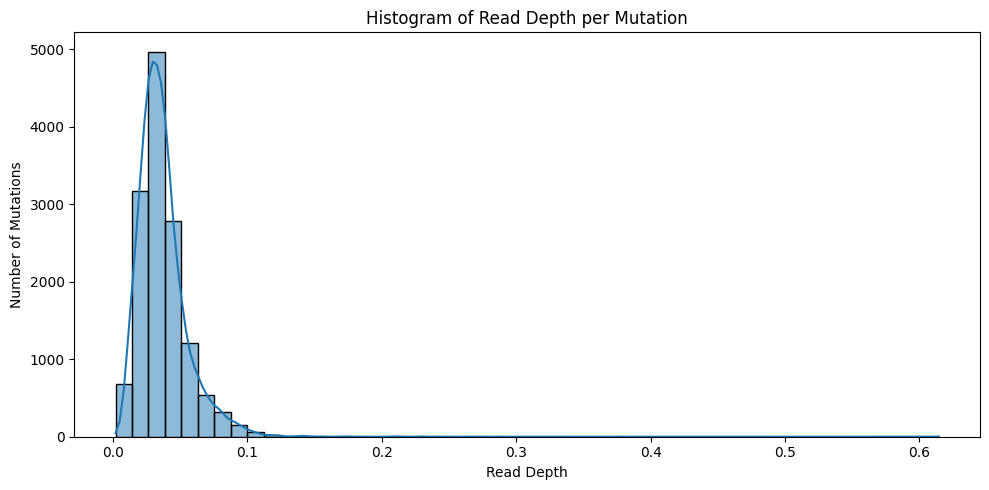

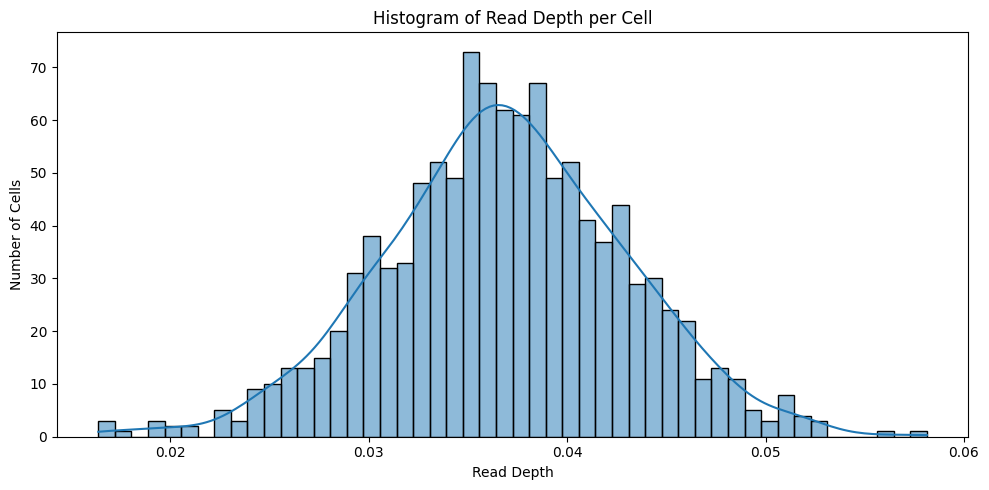

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your DataFrame is called df

# Histogram 1: Read depths per mutation
mutation_read_depths = dataframe.groupby("mutation")["total"].sum()

plt.figure(figsize=(10, 5))
sns.histplot(mutation_read_depths / total_cells, bins=50, kde=True)
plt.title("Histogram of Read Depth per Mutation")
plt.xlabel("Read Depth")
plt.ylabel("Number of Mutations")
plt.tight_layout()
plt.show()

# Histogram 2: Read depths per cell
cell_read_depths = dataframe.groupby("cell_id")["total"].sum()

plt.figure(figsize=(10, 5))
sns.histplot(cell_read_depths / total_mutations, bins=50, kde=True)
plt.title("Histogram of Read Depth per Cell")
plt.xlabel("Read Depth")
plt.ylabel("Number of Cells")
plt.tight_layout()
plt.show()

In [ ]:
merged = pd.merge(dataframe, df_cellclust, left_on='cell_id', right_on='cell', how='left')
merged

,chrom,snv_pos,cell_id,alt_base,alt,total,mutation,cell,cluster
0,chr1,12747,796,A,1,1,chr1:12747:A,796,8
1,chr1,12747,36,A,1,1,chr1:12747:A,36,15
2,chr1,12747,804,A,1,1,chr1:12747:A,804,17
3,chr1,12747,838,A,1,1,chr1:12747:A,838,6
4,chr1,12747,922,A,1,1,chr1:12747:A,922,7
...,...,...,...,...,...,...,...,...,...
485784,chrY,4250,429,G,0,2,chrY:4250:G,429,13
485785,chrY,4250,894,G,0,1,chrY:4250:G,894,17
485786,chrY,4250,285,G,0,1,chrY:4250:G,285,8
485787,chrY,4250,338,G,0,1,chrY:4250:G,338,10


In [ ]:
total_table = merged.pivot_table(
    index='cluster',
    columns='mutation',
    values='total',  # any column will do, we just want count
    aggfunc='sum',
    fill_value=0
)
total_table

mutation,chr10:0:T,chr10:10004:C,chr10:10005:T,chr10:1000:A,chr10:10026:A,chr10:10031:C,chr10:1003:T,chr10:10059:A,chr10:1005:T,chr10:10062:C,...,chrX:9529:T,chrX:9665:A,chrX:9672:A,chrX:9703:G,chrX:9807:T,chrX:9982:G,chrY:4250:G,chrY:5260:G,chrY:7291:T,chrY:8877:A
cluster,,,,,,,,,,,,,,,,,,,,,
1,0,3,0,0,2,0,3,0,0,1,...,0,2,5,1,1,0,4,4,1,0
2,9,3,5,4,3,0,1,4,2,0,...,2,2,0,4,1,2,1,1,0,1
3,4,6,8,2,9,0,8,5,2,9,...,2,2,3,7,1,4,15,11,2,2
4,2,3,1,3,4,2,3,7,6,4,...,2,0,2,3,1,1,5,7,3,1
5,4,2,4,0,1,2,1,3,3,1,...,0,2,1,2,1,1,0,4,0,0
6,1,0,1,1,1,5,1,0,2,0,...,0,0,0,4,3,1,7,4,3,0
7,2,1,6,1,0,2,6,4,0,4,...,0,1,3,0,0,3,5,12,0,1
8,11,8,14,8,10,4,15,18,11,12,...,6,3,6,14,8,8,19,16,12,3
9,0,1,0,1,0,1,1,0,1,0,...,0,1,1,0,1,0,1,1,0,0


In [ ]:
alt_table = merged.pivot_table(
    index='cluster',
    columns='mutation',
    values='alt',  # any column will do, we just want count
    aggfunc='sum',
    fill_value=0
)
alt_table

mutation,chr10:0:T,chr10:10004:C,chr10:10005:T,chr10:1000:A,chr10:10026:A,chr10:10031:C,chr10:1003:T,chr10:10059:A,chr10:1005:T,chr10:10062:C,...,chrX:9529:T,chrX:9665:A,chrX:9672:A,chrX:9703:G,chrX:9807:T,chrX:9982:G,chrY:4250:G,chrY:5260:G,chrY:7291:T,chrY:8877:A
cluster,,,,,,,,,,,,,,,,,,,,,
1,0,2,0,0,2,0,2,0,0,1,...,0,0,4,1,0,0,0,0,0,0
2,3,1,0,3,2,0,1,0,0,0,...,0,0,0,2,0,0,0,0,0,1
3,0,4,4,2,5,0,6,0,0,5,...,0,0,2,6,0,0,1,0,0,0
4,0,0,0,3,3,0,1,2,0,3,...,0,0,0,1,0,0,1,1,0,1
5,2,1,1,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
6,0,0,0,0,1,2,0,0,0,0,...,0,0,0,1,0,0,1,0,1,0
7,1,1,0,1,0,0,6,1,0,3,...,0,0,3,0,0,0,0,4,0,1
8,3,7,3,3,5,0,13,6,0,12,...,3,0,3,9,0,4,2,2,3,3
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
frac_table = alt_table.div(total_table).replace(np.nan, 0)
frac_table

mutation,chr10:0:T,chr10:10004:C,chr10:10005:T,chr10:1000:A,chr10:10026:A,chr10:10031:C,chr10:1003:T,chr10:10059:A,chr10:1005:T,chr10:10062:C,...,chrX:9529:T,chrX:9665:A,chrX:9672:A,chrX:9703:G,chrX:9807:T,chrX:9982:G,chrY:4250:G,chrY:5260:G,chrY:7291:T,chrY:8877:A
cluster,,,,,,,,,,,,,,,,,,,,,
1,0.000000,0.666667,0.000000,0.000,1.000000,0.000000,0.666667,0.000000,0.000000,1.000000,...,0.0,0.0,0.800000,1.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0
2,0.333333,0.333333,0.000000,0.750,0.666667,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.500000,0.0,0.0,0.000000,0.000000,0.000000,1.0
3,0.000000,0.666667,0.500000,1.000,0.555556,0.000000,0.750000,0.000000,0.000000,0.555556,...,0.0,0.0,0.666667,0.857143,0.0,0.0,0.066667,0.000000,0.000000,0.0
4,0.000000,0.000000,0.000000,1.000,0.750000,0.000000,0.333333,0.285714,0.000000,0.750000,...,0.0,0.0,0.000000,0.333333,0.0,0.0,0.200000,0.142857,0.000000,1.0
5,0.500000,0.500000,0.250000,0.000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.500000,0.0,0.0,0.000000,0.000000,0.000000,0.0
6,0.000000,0.000000,0.000000,0.000,1.000000,0.400000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.250000,0.0,0.0,0.142857,0.000000,0.333333,0.0
7,0.500000,1.000000,0.000000,1.000,0.000000,0.000000,1.000000,0.250000,0.000000,0.750000,...,0.0,0.0,1.000000,0.000000,0.0,0.0,0.000000,0.333333,0.000000,1.0
8,0.272727,0.875000,0.214286,0.375,0.500000,0.000000,0.866667,0.333333,0.000000,1.000000,...,0.5,0.0,0.500000,0.642857,0.0,0.5,0.105263,0.125000,0.250000,1.0
9,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0


In [ ]:
import numpy as np

print("Any NaNs:", frac_table.isna().values.any())
print("Any +inf:", np.isinf(frac_table.values).any())
print("Any -inf:", np.isneginf(frac_table.values).any())

print(frac_table.dtypes)

Any NaNs: False
Any +inf: False
Any -inf: False
mutation
chr10:0:T        float64
chr10:10004:C    float64
chr10:10005:T    float64
chr10:1000:A     float64
chr10:10026:A    float64
                  ...   
chrX:9982:G      float64
chrY:4250:G      float64
chrY:5260:G      float64
chrY:7291:T      float64
chrY:8877:A      float64
Length: 13934, dtype: object


In [ ]:
from sklearn.cluster import SpectralBiclustering
import numpy as np

model = SpectralBiclustering(n_clusters=8, method='log', random_state=0)
model.fit(frac_table.values)

# Reorder matrix by clusters
frac_biclust = frac_table.iloc[np.argsort(model.row_labels_)]
frac_biclust = frac_biclust.iloc[:, np.argsort(model.column_labels_)]


<Axes: xlabel='mutation', ylabel='cluster'>

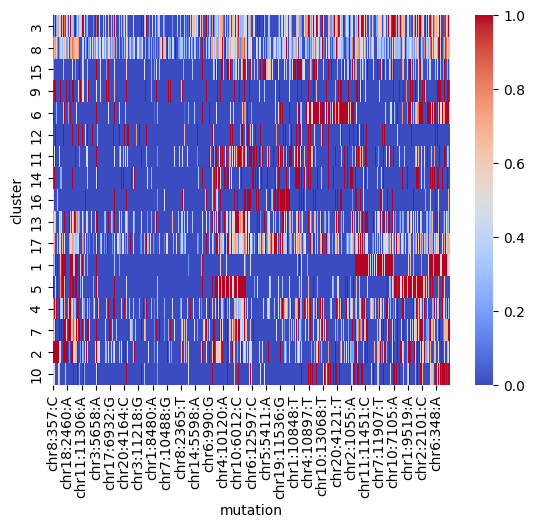

In [ ]:
import seaborn as sns
sns.heatmap(frac_biclust, cmap='coolwarm')

In [ ]:
from sklearn.metrics import pairwise_distances
import numpy as np

def checkerboard_error(model, data):
    rows = np.argsort(model.row_labels_)
    cols = np.argsort(model.column_labels_)
    reordered = data[np.ix_(rows, cols)]
    block_means = np.zeros_like(reordered)

    # Check if n_clusters is an integer or a tuple
    if isinstance(model.n_clusters, int):
        n_row_clusters = model.n_clusters
        n_col_clusters = model.n_clusters
    else:
        n_row_clusters, n_col_clusters = model.n_clusters


    for i in range(n_row_clusters):
        row_idx = np.where(model.row_labels_ == i)[0]
        for j in range(n_col_clusters):
            col_idx = np.where(model.column_labels_ == j)[0]
            block = reordered[np.ix_(row_idx, col_idx)]
            block_mean = block.mean()
            block_means[np.ix_(row_idx, col_idx)] = block_mean

    return np.linalg.norm(reordered - block_means)

In [ ]:
errors = []
for k in range(2, 10):
    model = SpectralBiclustering(n_clusters=k, method='log', random_state=0)
    model.fit(frac_table.values)
    err = checkerboard_error(model, frac_table.values)
    errors.append((k, err))

# Find the k with the lowest error
best_k = min(errors, key=lambda x: x[1])[0]
print("Best k:", best_k)


Best k: 8


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.cluster import SpectralBiclustering

# Fit model
model = SpectralBiclustering(n_clusters=8, method='log', random_state=0)
model.fit(frac_table.values)

# Reorder rows and columns by cluster
row_order = np.argsort(model.row_labels_)
col_order = np.argsort(model.column_labels_)

frac_biclust = frac_table.iloc[row_order, :]
frac_biclust = frac_biclust.iloc[:, col_order]

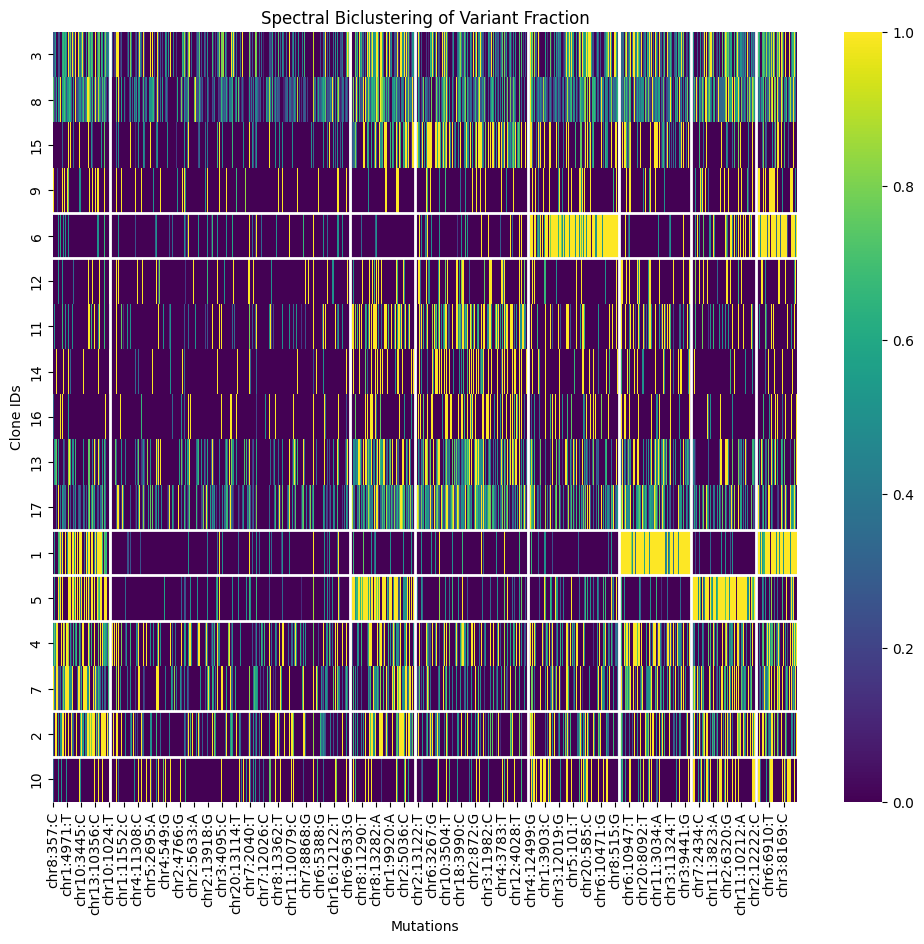

In [ ]:
# Get where the cluster boundaries are
row_clusters, row_counts = np.unique(model.row_labels_[row_order], return_counts=True)
col_clusters, col_counts = np.unique(model.column_labels_[col_order], return_counts=True)

row_lines = np.cumsum(row_counts)[:-1]
col_lines = np.cumsum(col_counts)[:-1]

# Plot with boundaries
plt.figure(figsize=(12, 10))
ax = sns.heatmap(frac_biclust, cmap='viridis', cbar=True)

# Draw horizontal lines
for r in row_lines:
    ax.axhline(r, color='white', lw=2)

# Draw vertical lines
for c in col_lines:
    ax.axvline(c, color='white', lw=2)

plt.title("Spectral Biclustering of Variant Fraction")
plt.xlabel("Mutations")
plt.ylabel("Clone IDs")
plt.show()


## ConDoR

In [ ]:
num_mutations = 15

In [ ]:
total_table.index.name = None
total_table = total_table.iloc[:, :num_mutations]
total_table.to_csv(os.path.join(ROOT_DIR, "total_table.csv"))
alt_table.index.name = None
alt_table = alt_table.iloc[:, :num_mutations]
alt_table.to_csv(os.path.join(ROOT_DIR, "alt_table.csv"))

In [ ]:
character_matrix = total_table.copy()
cols_to_binarize = character_matrix.columns.difference(['mutation'])
character_matrix[cols_to_binarize] = (character_matrix[cols_to_binarize] > 0).astype(int)
character_matrix['cluster_id'] = character_matrix.index - 1
character_matrix.to_csv(os.path.join(ROOT_DIR, "character_matrix.csv"))
character_matrix

mutation,chr10:0:T,chr10:10004:C,chr10:10005:T,chr10:1000:A,chr10:10026:A,chr10:10031:C,chr10:1003:T,chr10:10059:A,chr10:1005:T,chr10:10062:C,chr10:10066:G,chr10:10100:T,chr10:10108:T,chr10:10131:C,chr10:10155:T,cluster_id
1,0,1,0,0,1,0,1,0,0,1,1,1,1,1,1,0
2,1,1,1,1,1,0,1,1,1,0,1,1,1,1,1,1
3,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,2
4,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,3
5,1,1,1,0,1,1,1,1,1,1,0,1,1,1,0,4
6,1,0,1,1,1,1,1,0,1,0,1,1,1,1,1,5
7,1,1,1,1,0,1,1,1,0,1,1,1,1,1,1,6
8,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,7
9,0,1,0,1,0,1,1,0,1,0,1,1,1,0,0,8
10,1,1,1,0,0,1,1,1,1,1,1,1,1,1,0,9


In [ ]:
!git clone https://github.com/raphael-group/ConDoR.git

Cloning into 'ConDoR'...
remote: Enumerating objects: 110, done.
remote: Counting objects: 100% (110/110), done.
remote: Compressing objects: 100% (92/92), done.
remote: Total 110 (delta 32), reused 66 (delta 16), pack-reused 0 (from 0)
Receiving objects: 100% (110/110), 1.96 MiB | 2.68 MiB/s, done.
Resolving deltas: 100% (32/32), done.


In [ ]:
!pip install networkx gurobipy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.5/14.5 MB 86.0 MB/s eta 0:00:00


In [ ]:
!python3 /content/ConDoR/src/condor.py -i  /content/data/TN1/character_matrix.csv -a 0.0018 -b 0.001 -t 1800 -k 1 -r /content/data/TN1/total_table.csv -v /content/data/TN1/alt_table.csv -o tn

Set parameter WLSAccessID
Set parameter WLSSecret
Set parameter LicenseID to value 2687964
Academic license 2687964 - for non-commercial use only - registered to sa___@iict.buet.ac.bd
n = 17, m = 15, p = 17
Set parameter Threads to value 1
Set parameter Method to value 4
Set parameter FeasibilityTol to value 1e-06
Set parameter IntFeasTol to value 1e-06
Set parameter OptimalityTol to value 1e-06
Gurobi Optimizer version 12.0.3 build v12.0.3rc0 (linux64 - "Ubuntu 22.04.4 LTS")

CPU model: Intel(R) Xeon(R) CPU @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 1 threads

Non-default parameters:
IntFeasTol  1e-06
Method  4
Threads  1

Academic license 2687964 - for non-commercial use only - registered to sa___@iict.buet.ac.bd
Optimize a model with 24150 rows, 3105 columns and 78015 nonzeros
Model fingerprint: 0xdb64ff59
Variable types: 2595 continuous, 510 integer (510 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+0

In [ ]:
!pip install graphviz pydot

In [ ]:
from graphviz import Source

with open("tn_tree.dot") as f:
    dot_data = f.read()

Source(dot_data).render("tree_output", format="png", view=True)  # PNG and auto-open

'tree_output.png'

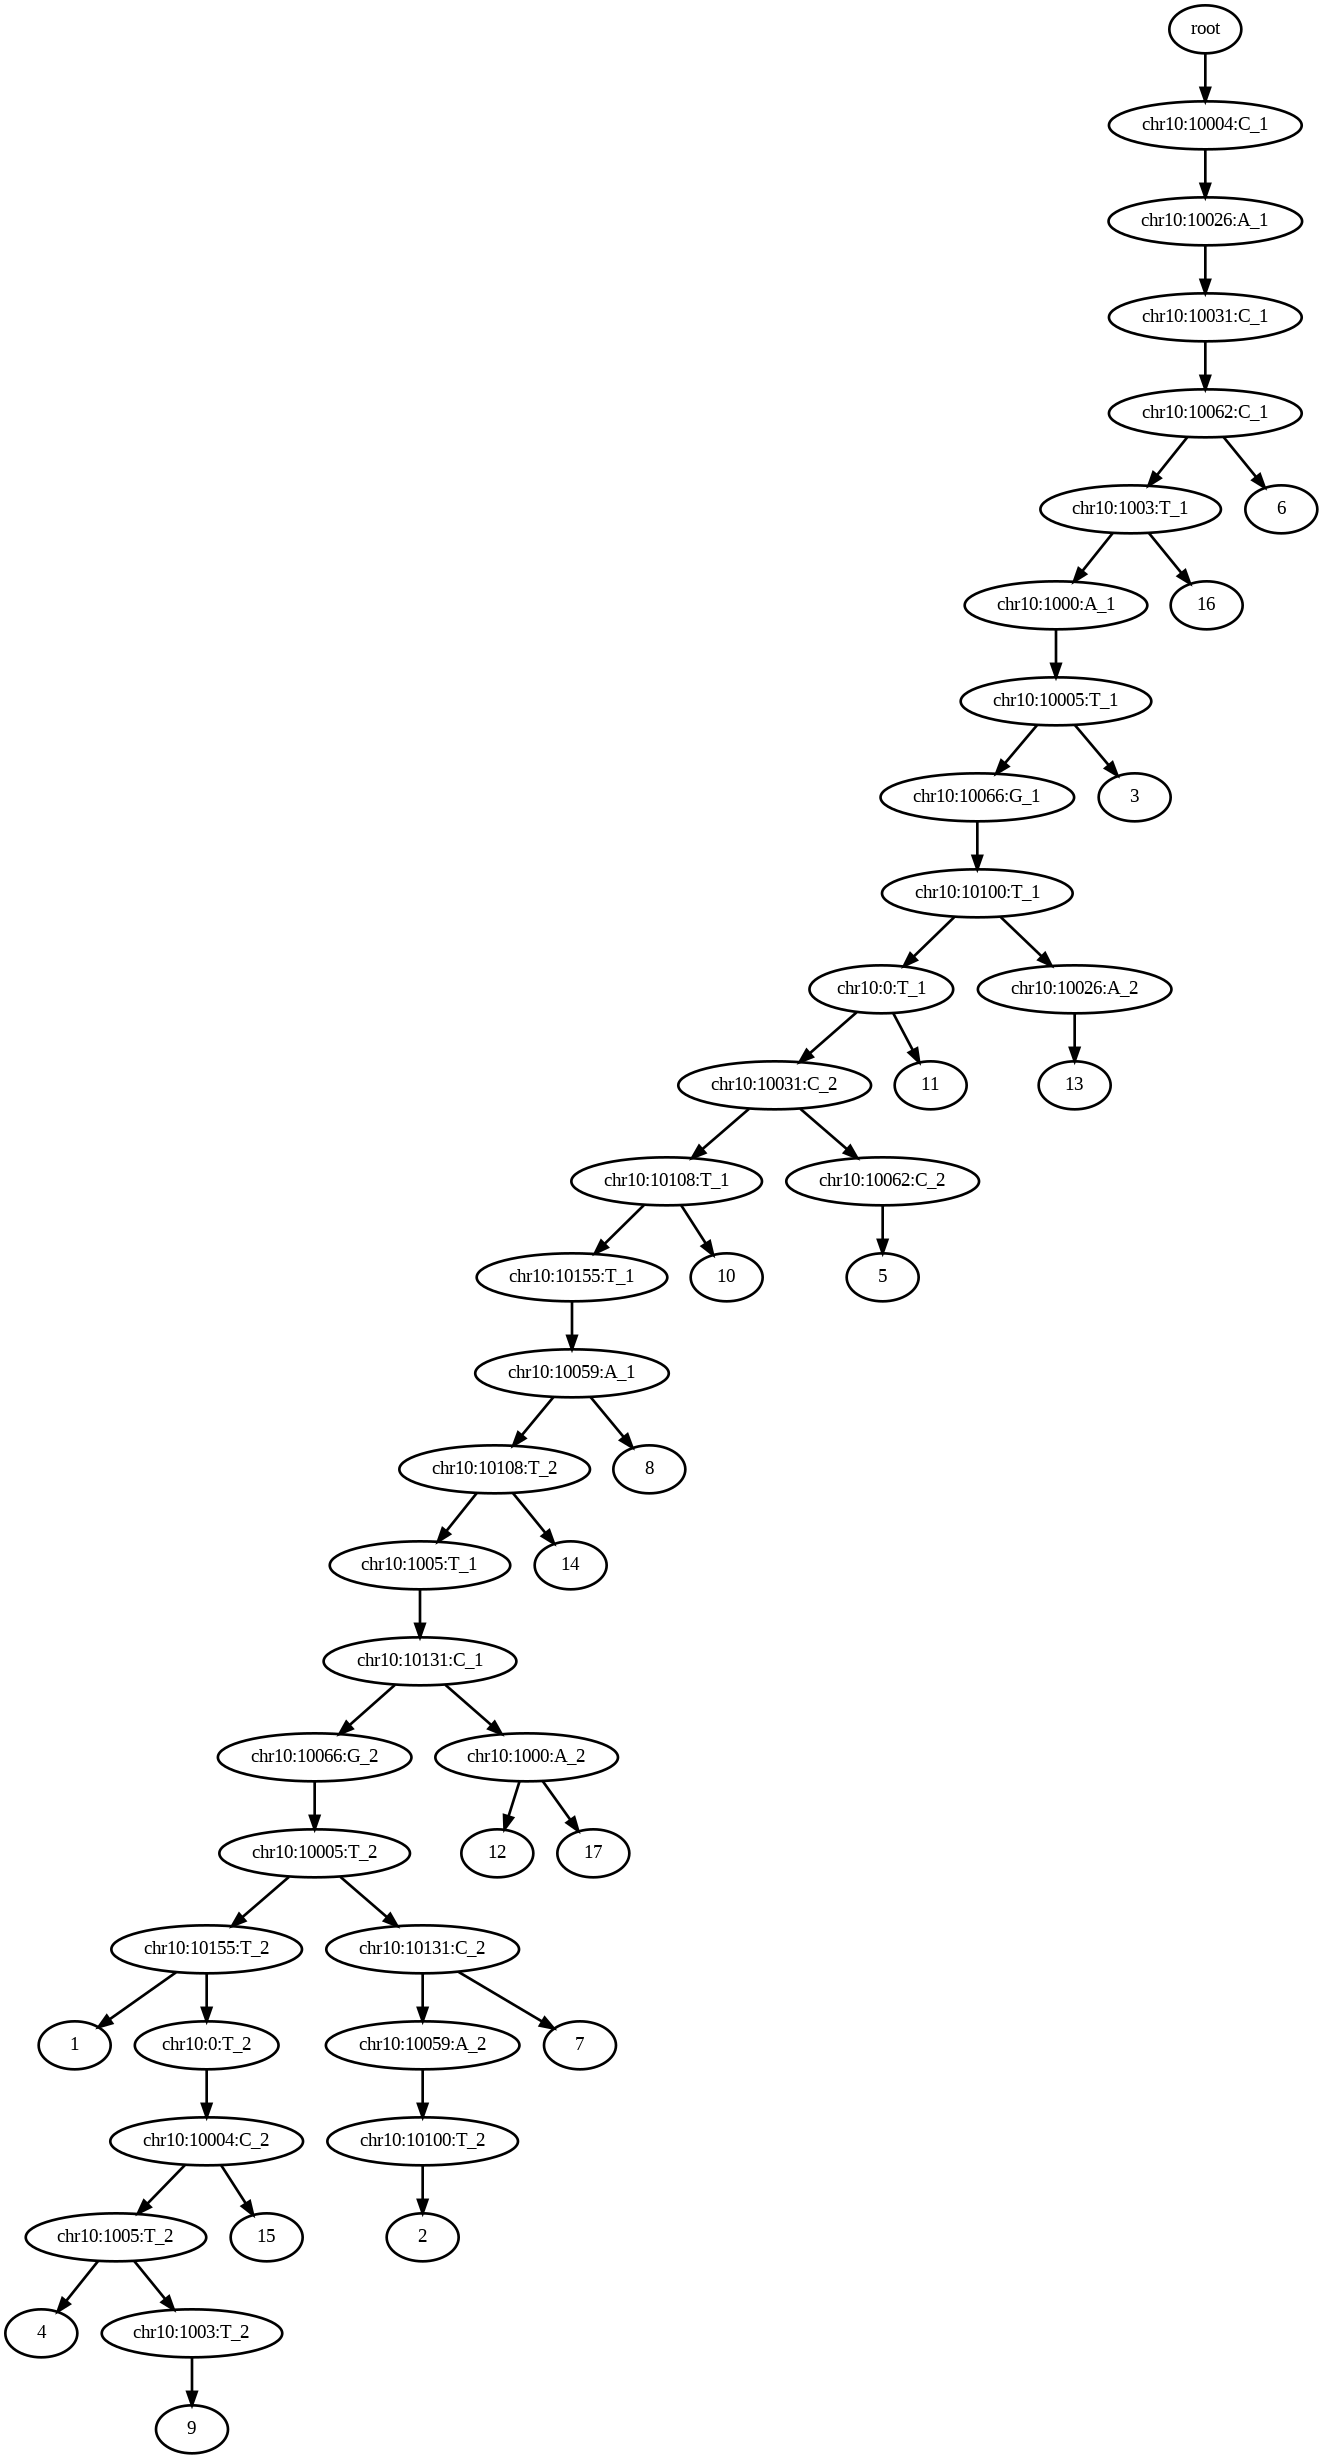

In [ ]:
from IPython.display import Image
Image("tree_output.png")

In [ ]:
from graphviz import Source

with open("tn_tree_without_cells.dot") as f:
    dot_data = f.read()

Source(dot_data).render("tree_output_without_cells", format="png", view=True)  # PNG and auto-open

'tree_output_without_cells.png'